In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import zipfile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

import os


In [31]:
zip_path= r"C:\Users\ncc333\Downloads\wine+quality (1).zip"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    

    with zipfile.ZipFile(zip_path) as z:
        with z.open('winequality-white.csv') as f:
            white_wine = pd.read_csv(f,sep = ";")
            white_wine.head()
            df = white_wine.copy()

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [32]:
white_wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [33]:
white_wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              

In [34]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
white_wine.duplicated().sum()

np.int64(937)

In [26]:
white_wine.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [27]:
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Summary of the data cleaning process
The data has no missing values so there is no need for cleaning
There is 937 duplicates in the white_wine dataset so there is need to drop the duplicates in order not to affect the data set while exploring it
All the data types are numerical and they are all on float and integer so there is no need for conversion to objects

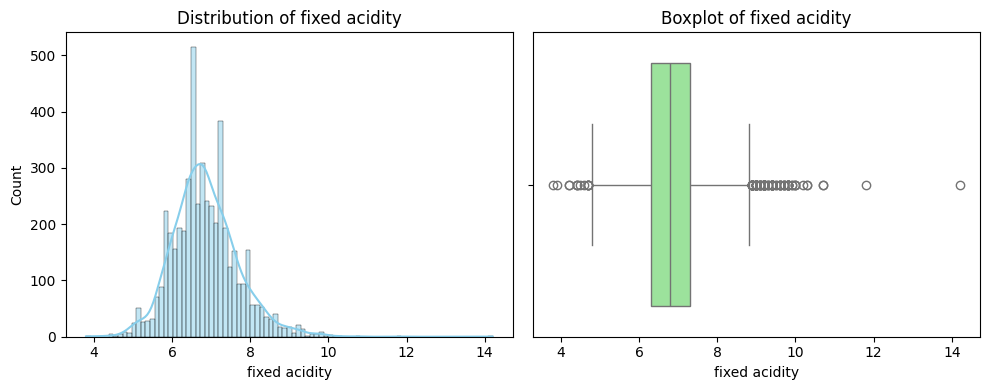

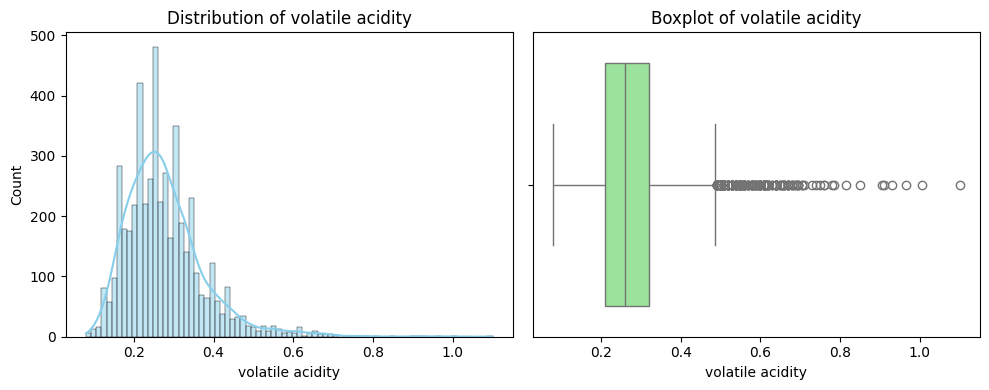

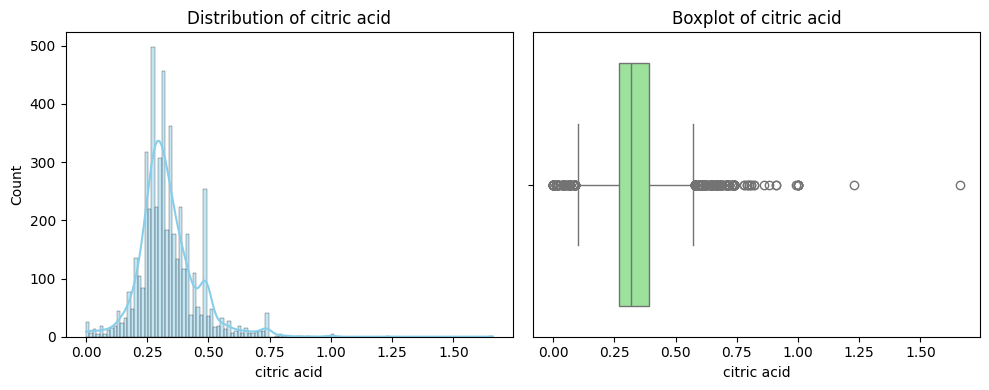

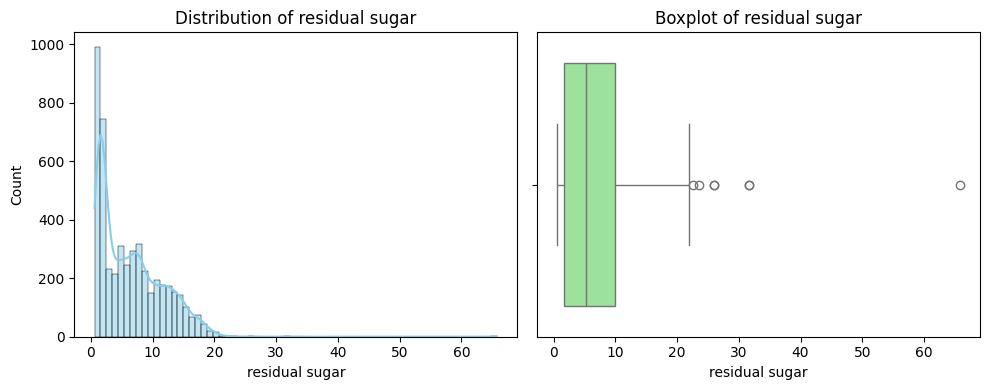

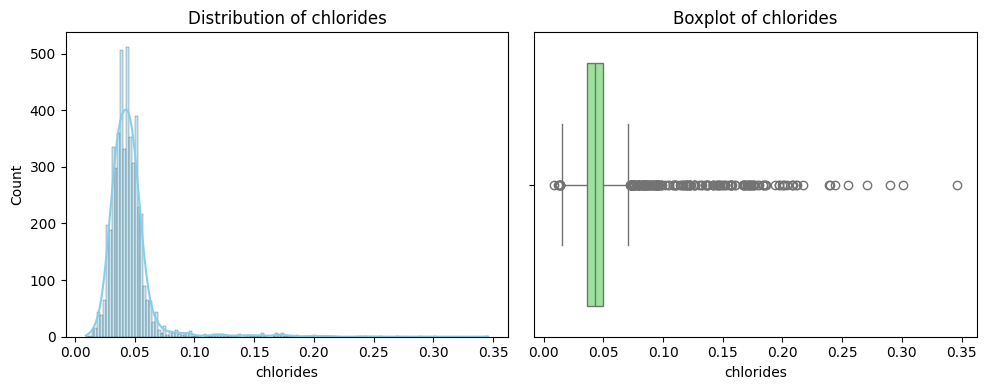

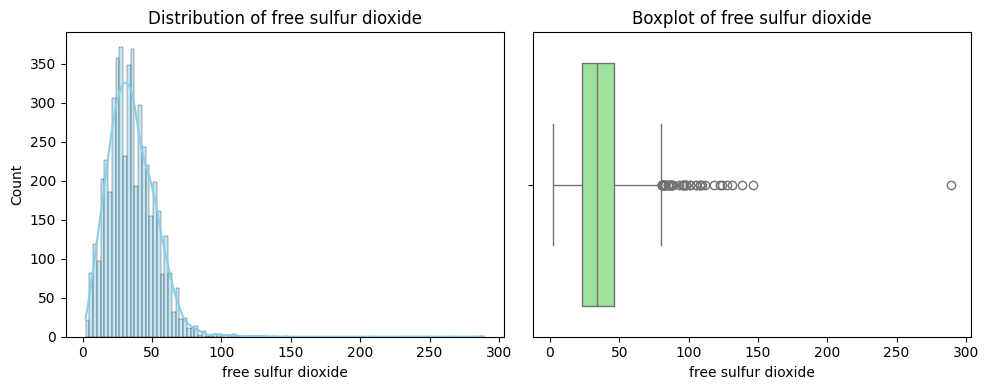

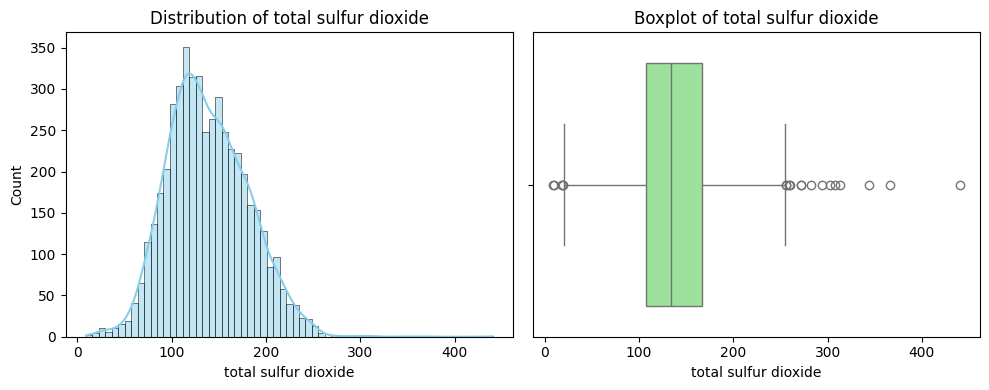

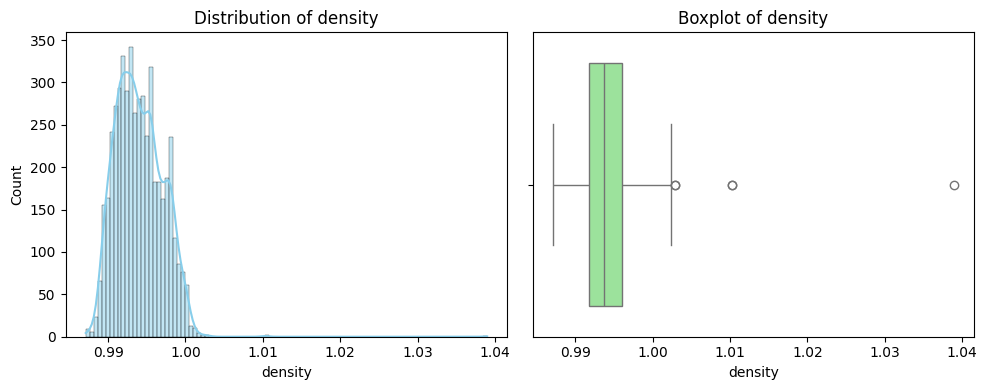

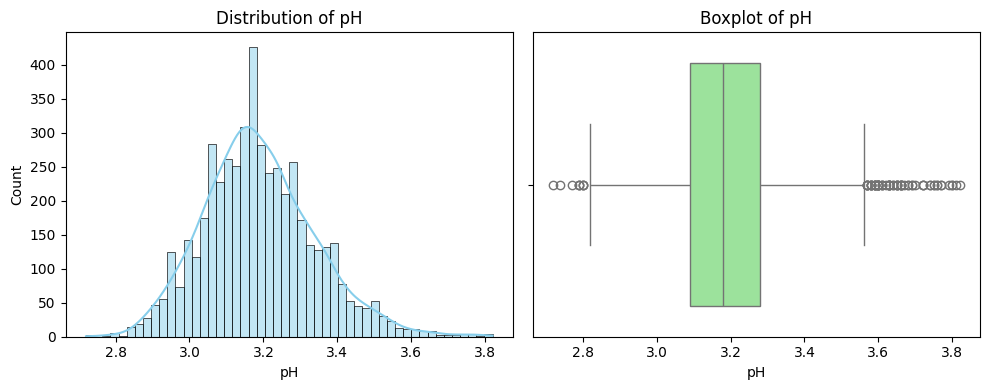

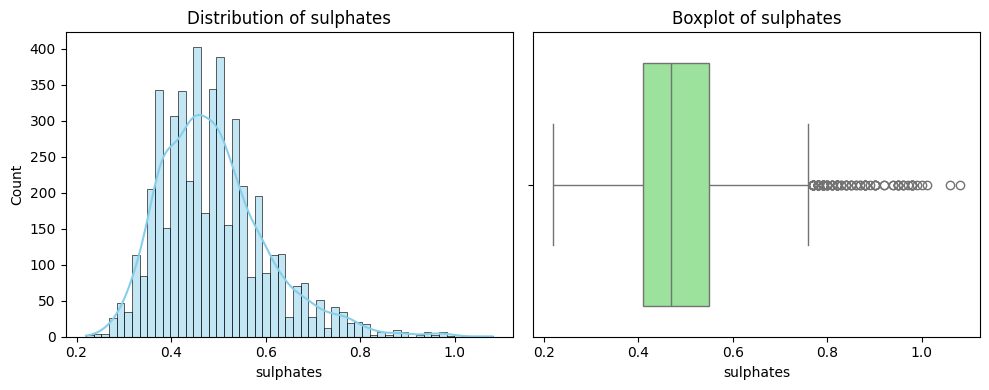

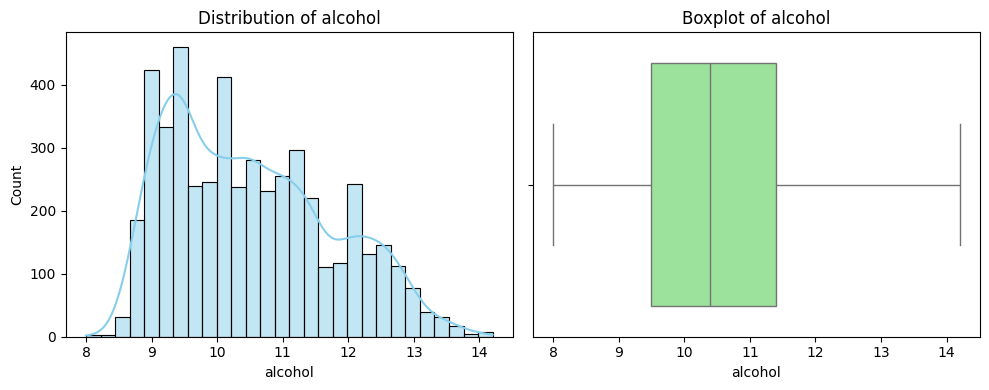

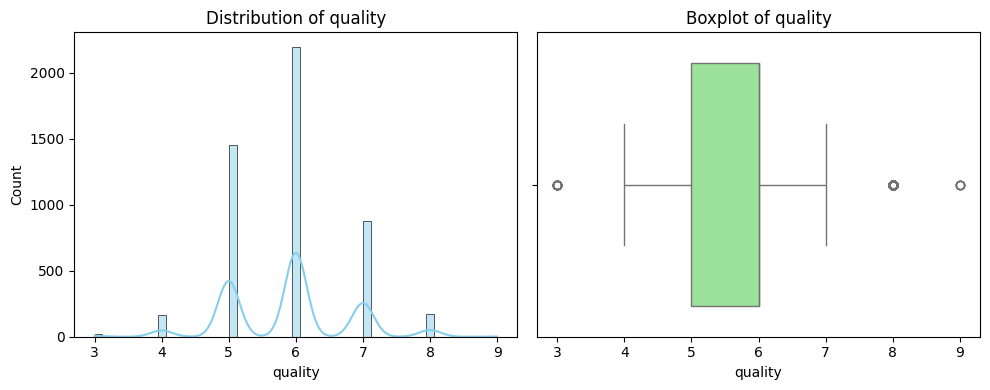


=== Correlation with Target (quality) ===
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


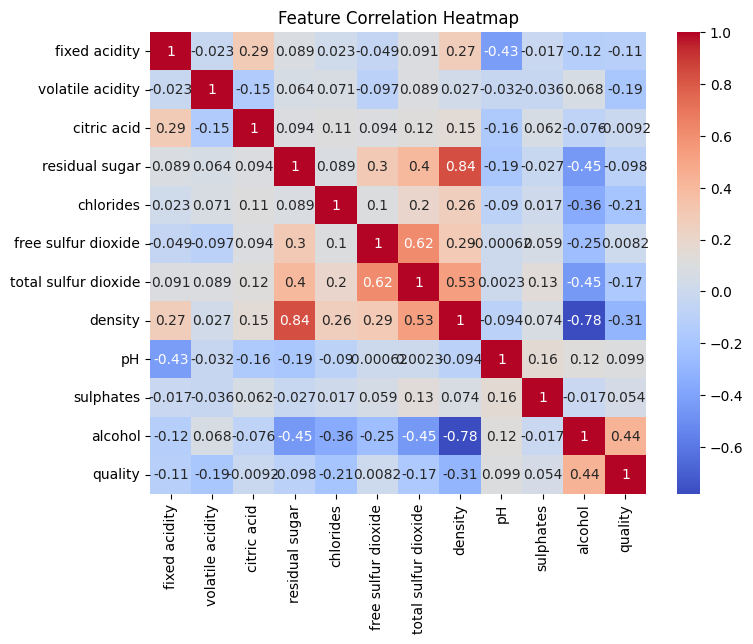


=== VALUE COUNTS OF MAPPED QUALITY ===
quality_label
Good       3078
Average    1457
Bad         183
Best        180
Name: count, dtype: int64

Scaled feature sample:
   fixed acidity  volatile acidity  citric acid  ...        pH  sulphates   alcohol
0       0.172097         -0.081770     0.213280  ... -1.246921  -0.349184 -1.393152
1      -0.657501          0.215896     0.048001  ...  0.740029   0.001342 -0.824276
2       1.475751          0.017452     0.543838  ...  0.475102  -0.436816 -0.336667
3       0.409125         -0.478657    -0.117278  ...  0.011480  -0.787342 -0.499203
4       0.409125         -0.478657    -0.117278  ...  0.011480  -0.787342 -0.499203

[5 rows x 11 columns]

Target sample:
0    Good
1    Good
2    Good
3    Good
4    Good
Name: quality_label, dtype: object

Train shape: (3918, 11)
Test shape: (980, 11)


In [63]:


# === LOAD DATA ===
# Replace the path with the correct CSV file path if needed


# === UNIVARIATE ANALYSIS (Histograms + Boxplots) ===
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# === CORRELATION WITH TARGET (quality) ===
corr_matrix = df.corr(numeric_only=True)
print("\n=== Correlation with Target (quality) ===")
print(corr_matrix['quality'].sort_values(ascending=False))

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# === MAP QUALITY INTO CATEGORIES ===
quality_map = {
    9: "Best",
    8: "Best",
    7: "Good",
    6: "Good",
    5: "Average",
    4: "Bad",
    3: "Bad"
}

df['quality_label'] = df['quality'].map(quality_map)

print("\n=== VALUE COUNTS OF MAPPED QUALITY ===")
print(df['quality_label'].value_counts())

# === SPLIT FEATURES AND TARGET ===
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# === APPLY SCALING ===
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# === SHOW FINAL OUTPUT ===
print("\nScaled feature sample:")
print(X_scaled.head())

print("\nTarget sample:")
print(y.head())

# === OPTIONAL: TRAIN/TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


### 

=== MODEL EVALUATION METRICS ===
Accuracy:  0.7194
Precision: 0.7246
Recall:    0.7194
F1-score:  0.7216

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

     Average       0.63      0.66      0.64       291
         Bad       0.32      0.32      0.32        37
        Best       0.45      0.53      0.49        36
        Good       0.81      0.78      0.80       616

    accuracy                           0.72       980
   macro avg       0.55      0.57      0.56       980
weighted avg       0.72      0.72      0.72       980



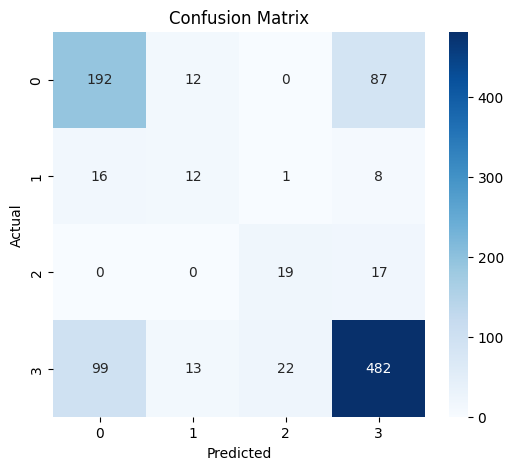


INTERPRETATION:
- Accuracy: Overall proportion of correctly predicted labels.
- Precision: Of all samples predicted as a class, how many were actually that class.
- Recall: Of all actual samples in a class, how many were correctly identified.
- F1-score: Harmonic mean of Precision and Recall (balances both).
Higher values (close to 1) indicate the model makes more reliable predictions.



In [66]:
# === BASELINE CLASSIFICATION MODEL ===


# --- Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Initialize model (choose one: Logistic Regression or Decision Tree) ---
# model = LogisticRegression(max_iter=1000, random_state=42)
model = DecisionTreeClassifier(random_state=42)

# --- Train model ---
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Evaluation Metrics ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("=== MODEL EVALUATION METRICS ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# --- Detailed classification report ---
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- INTERPRETATION ---
print("""
INTERPRETATION:
- Accuracy: Overall proportion of correctly predicted labels.
- Precision: Of all samples predicted as a class, how many were actually that class.
- Recall: Of all actual samples in a class, how many were correctly identified.
- F1-score: Harmonic mean of Precision and Recall (balances both).
Higher values (close to 1) indicate the model makes more reliable predictions.
""")



=== RANDOM FOREST ===
              precision    recall  f1-score   support

     Average       0.74      0.68      0.71       291
         Bad       0.83      0.27      0.41        37
        Best       0.94      0.42      0.58        36
        Good       0.81      0.91      0.86       616

    accuracy                           0.80       980
   macro avg       0.83      0.57      0.64       980
weighted avg       0.80      0.80      0.79       980



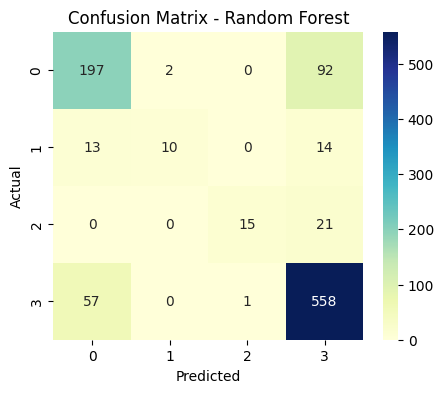


=== K-NEAREST NEIGHBORS ===
              precision    recall  f1-score   support

     Average       0.61      0.58      0.59       291
         Bad       0.33      0.08      0.13        37
        Best       0.45      0.14      0.21        36
        Good       0.76      0.85      0.80       616

    accuracy                           0.71       980
   macro avg       0.54      0.41      0.44       980
weighted avg       0.69      0.71      0.69       980



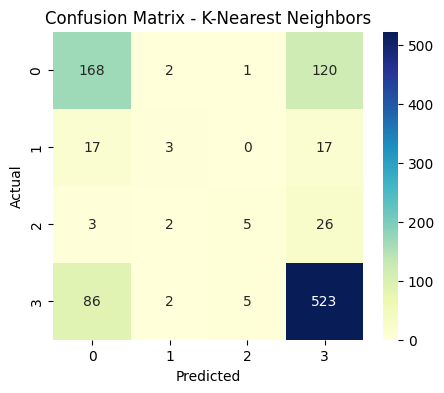


=== GRADIENT BOOSTING ===
              precision    recall  f1-score   support

     Average       0.65      0.57      0.61       291
         Bad       0.65      0.35      0.46        37
        Best       0.57      0.11      0.19        36
        Good       0.77      0.87      0.82       616

    accuracy                           0.73       980
   macro avg       0.66      0.48      0.52       980
weighted avg       0.72      0.73      0.72       980



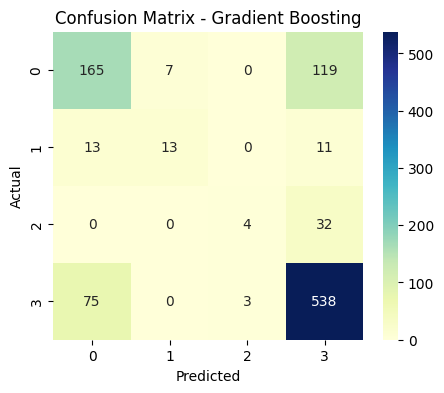


=== SUPPORT VECTOR MACHINE ===
              precision    recall  f1-score   support

     Average       0.63      0.53      0.57       291
         Bad       1.00      0.03      0.05        37
        Best       0.00      0.00      0.00        36
        Good       0.75      0.89      0.81       616

    accuracy                           0.72       980
   macro avg       0.59      0.36      0.36       980
weighted avg       0.69      0.72      0.68       980



c:\Users\ncc333\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ncc333\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ncc333\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

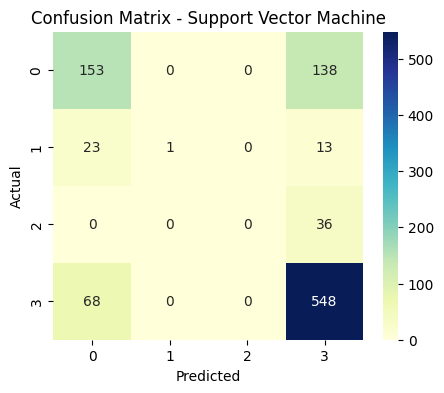


=== MODEL PERFORMANCE COMPARISON ===
                    Model  Accuracy  Precision    Recall  F1-score
0           Random Forest  0.795918   0.797024  0.795918  0.785459
2       Gradient Boosting  0.734694   0.722290  0.734694  0.718123
1     K-Nearest Neighbors  0.713265   0.690564  0.713265  0.694308
3  Support Vector Machine  0.716327   0.692599  0.716327  0.681754

 Best Performing Model: Random Forest

INTERPRETATION:
- Accuracy shows overall correctness.
- Precision shows how reliable the positive predictions are.
- Recall shows how well the model identifies actual positives.
- F1-score balances Precision and Recall.
The model with the highest F1-score generally provides the best trade-off between these metrics.



In [68]:


# --- Initialize models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42)
}

# --- Evaluate each model ---
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

    print(f"\n=== {name.upper()} ===")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# --- Create comparison DataFrame ---
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by="F1-score", ascending=False)
print("\n=== MODEL PERFORMANCE COMPARISON ===")
print(comparison_df)

# --- Identify best model ---
best_model_name = comparison_df.iloc[0]["Model"]
print(f"\n Best Performing Model: {best_model_name}")

# --- INTERPRETATION ---
print("""
INTERPRETATION:
- Accuracy shows overall correctness.
- Precision shows how reliable the positive predictions are.
- Recall shows how well the model identifies actual positives.
- F1-score balances Precision and Recall.
The model with the highest F1-score generally provides the best trade-off between these metrics.
""")


Best model selected for tuning: Random Forest
Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== BEST PARAMETERS FOUND ===
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}

=== OPTIMIZED MODEL PERFORMANCE ===
Accuracy:  0.8020
Precision: 0.8031
Recall:    0.8020
F1-score:  0.7916

Classification Report:
               precision    recall  f1-score   support

     Average       0.75      0.69      0.72       291
         Bad       0.83      0.27      0.41        37
        Best       0.94      0.42      0.58        36
        Good       0.82      0.91      0.86       616

    accuracy                           0.80       980
   macro avg       0.83      0.57      0.64       980
weighted avg       0.80      0.80      0.79       980



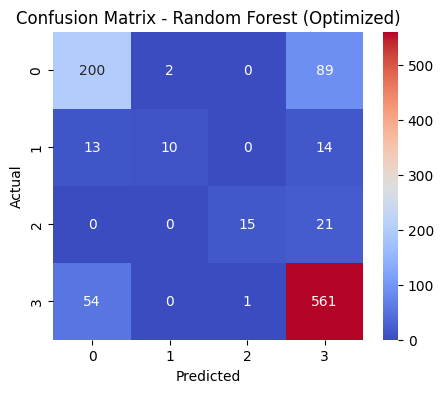


COMMENTARY:
If the optimized model’s F1-score and Recall improved compared to the baseline, 
it indicates that hyperparameter tuning helped the model generalize better.
If there’s little to no improvement, it may suggest that the base configuration 
was already near optimal or that the data is not highly sensitive to those parameters.



In [70]:
# === MODEL OPTIMIZATION USING RANDOMIZED SEARCH ===
# Select best model from previous comparison
best_model_name = comparison_df.iloc[0]["Model"]
print(f"Best model selected for tuning: {best_model_name}")

# Define parameter grids for each model type
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.8, 0.9, 1.0]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    }
}

# Get the model object from your models dictionary
model_to_tune = models[best_model_name]
param_dist = param_grids[best_model_name]

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=model_to_tune,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_weighted',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_

print("\n=== BEST PARAMETERS FOUND ===")
print(best_params)

# Retrain the best model with optimal hyperparameters
optimized_model = random_search.best_estimator_
y_pred_opt = optimized_model.predict(X_test)

# Re-evaluate performance
acc = accuracy_score(y_test, y_pred_opt)
prec = precision_score(y_test, y_pred_opt, average='weighted')
rec = recall_score(y_test, y_pred_opt, average='weighted')
f1 = f1_score(y_test, y_pred_opt, average='weighted')

print("\n=== OPTIMIZED MODEL PERFORMANCE ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title(f'Confusion Matrix - {best_model_name} (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- COMMENTARY ---
print("""
COMMENTARY:
If the optimized model’s F1-score and Recall improved compared to the baseline, 
it indicates that hyperparameter tuning helped the model generalize better.
If there’s little to no improvement, it may suggest that the base configuration 
was already near optimal or that the data is not highly sensitive to those parameters.
""")


In [ ]:
# === SAVE MODEL AND SCALER ===


# Save the optimized model
joblib.dump(optimized_model, 'model.pkl')
print(" Optimized model saved successfully as 'model.pkl'")

# Save the scaler (assuming your scaler variable is named 'scaler')
joblib.dump(scaler, 'scaler.pkl')
print(" Scaler saved successfully as 'scaler.pkl'")

print("\nBoth files (model.pkl and scaler.pkl) are ready for deployment.")


 Optimized model saved successfully as 'model.pkl'
 Scaler saved successfully as 'scaler.pkl'

Both files (model.pkl and scaler.pkl) are ready for deployment.
